<a href="https://colab.research.google.com/github/JThissen/Machine-Learning-using-Tensorflow/blob/master/ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random


In [0]:
class Utilities:
  @staticmethod
  def round_number(number, decimals = 3):
    return round(number * pow(10, decimals)) / pow(10, decimals) 


In [0]:
def generate_linear_values(x, offset):
  return 2 * x + random.uniform(0, offset)

def initialize_data():
  x_train = list([])
  y_train = list([])

  for i in range(0, 15):
    x_train.append(i)
    y_train.append(generate_linear_values(i, 15))

  x_train = np.array(x_train)
  y_train = np.array(y_train)
  return tuple((x_train, y_train))

def predict_y(w, x, b):
  return w * x + b

def loss_function(y_pred, y_target, container_size):
  mse = tf.reduce_sum(tf.pow(y_pred - y_target, 2)) / container_size
  return mse

def optimize_function(x_train):
  with tf.GradientTape() as gt:
    y_pred = predict_y(weight, x_train, bias)
    loss = loss_function(y_pred, y_train, len(x_train))

  gradients = gt.gradient(loss, [weight, bias])
  optimizer.apply_gradients(zip(gradients, [weight, bias]))

def train_model(iterations):
  for i in range(0, iterations + 1):
    optimize_function(x_train)

    if(i % 100 == 0):
      loss = loss_function(predict_y(weight, x_train, bias), y_train, len(x_train))
      print(f"iteration: {i}, loss: {Utilities.round_number(loss.numpy())}, weight: {Utilities.round_number(weight.numpy())}, bias: {Utilities.round_number(bias.numpy())}")

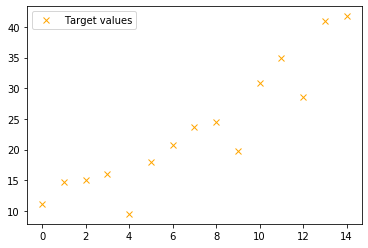

In [0]:
x_train, y_train = initialize_data()
weight = tf.Variable(random.uniform(0, 1), name="weight")
bias = tf.Variable(random.uniform(0, 1), name="bias")
optimizer = tf.optimizers.SGD(0.01)

plt.plot(x_train, y_train, "x", color="orange", label="Target values")
plt.legend()
plt.show()


iteration: 0, loss: 78.971, weight: 3.71, bias: 1.253
iteration: 100, loss: 20.369, weight: 2.545, bias: 4.351
iteration: 200, loss: 16.863, weight: 2.354, bias: 6.193
iteration: 300, loss: 15.69, weight: 2.243, bias: 7.259
iteration: 400, loss: 15.297, weight: 2.179, bias: 7.875
iteration: 500, loss: 15.166, weight: 2.142, bias: 8.232
iteration: 600, loss: 15.122, weight: 2.121, bias: 8.438
iteration: 700, loss: 15.107, weight: 2.108, bias: 8.557
iteration: 800, loss: 15.102, weight: 2.101, bias: 8.626
iteration: 900, loss: 15.101, weight: 2.097, bias: 8.666
iteration: 1000, loss: 15.1, weight: 2.094, bias: 8.689


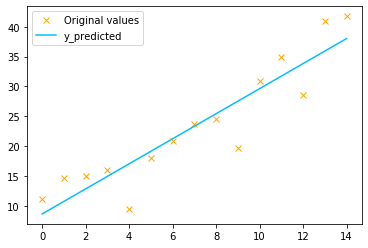

In [0]:
train_model(1000)
plt.plot(x_train, y_train, "x", color="orange", label="Original values")
plt.plot(x_train, np.array(weight * x_train + bias), color="#03befc", label="y_predicted")
plt.legend()
plt.show()